In [223]:
# 상대모멘텀 전략
# 0. parameter 입력
# 1. 데이터 가져오기
# 2. trading signal 생성하기
# 3. 수익률 산출하기
# 4. 성과지표 생성 

In [224]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as pdr
import FinanceDataReader as fdr
import matplotlib.pyplot as plt



In [225]:
# 1. 데이터 가져오기 
def get_data(TICKER, start_date, end_date) :
    df = pd.DataFrame(pdr.get_data_yahoo(TICKER, start = start_date, end = end_date)['Adj Close'])
    df.columns = TICKER
    return df 
df = get_data(TICKER, start_date, end_date)
df.head(5)

,SPY,QQQ,EFA,IWD,IJH,IWM,XLK,VNQ
Date,,,,,,,,
2020-12-31,371.444244,312.981171,71.975769,135.671753,228.600021,195.398453,129.424591,83.839691
2021-01-04,366.387390,308.561890,72.350639,133.845993,225.088913,192.847107,127.314301,81.115120
2021-01-05,368.910828,311.105743,73.100388,134.997025,228.351364,195.827026,128.140488,81.233582
2021-01-06,371.116394,306.796173,73.938919,138.380630,237.462341,203.839890,125.930664,81.371780
2021-01-07,376.630249,314.218201,74.017845,139.591171,239.968842,207.467606,129.325043,81.213837


In [226]:
# 2. trading signal 생성하기 
month_list = df.index.map(lambda x : datetime.datetime.strftime(x, '%Y-%m')).unique()
rebal_date= pd.DataFrame()
for m in month_list:
    rebal_date = rebal_date.append(df[df.index.map(lambda x : datetime.datetime.strftime(x, '%Y-%m'))== m].iloc[-1])
rebal_date.columns = TICKER
rebal_date = rebal_date/rebal_date.shift(lookback)
signal = (rebal_date.rank(axis=1, ascending = False) <= selected_num).applymap(lambda x : '1' if x else '0')
signal = pd.DataFrame(signal)
signal = signal.shift(1).fillna(0)
signal

,SPY,QQQ,EFA,IWD,IJH,IWM,XLK,VNQ
2020-12-31,0,0,0,0,0,0,0,0
2021-01-29,0,0,0,0,0,0,0,0
2021-02-26,0,1,0,1,1,0,0,0
2021-03-31,0,1,1,1,0,0,0,0
2021-04-30,0,1,1,0,0,0,1,0
2021-05-28,0,0,0,0,1,1,1,0
2021-06-30,1,0,1,0,0,0,1,0
2021-07-30,0,0,0,0,1,0,1,1
2021-08-13,0,0,0,0,1,0,1,1


In [227]:
# 2. 수익률 산출하기 
df = df.rename_axis('Date').reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df['YYYY-MM'] = df['Date'].map(lambda x : datetime.datetime.strftime(x, '%Y-%m'))
signal['YYYY-MM'] =signal.index.map(lambda x : datetime.datetime.strftime(x, '%Y-%m'))
book = pd.merge(df[['Date','YYYY-MM']], signal, on = 'YYYY-MM', how = 'left')
book.set_index(['Date'],inplace=True)
book = book[TICKER].astype(float)
df = df[['Date', 'SPY', 'QQQ', 'EFA', 'IWD','IJH','XLK','VNQ']]
df.set_index(['Date'],inplace=True)
df = df.pct_change().fillna(0)

In [228]:
result.tail(10)

,0
Date,
2021-08-02,-0.003189
2021-08-03,0.004494
2021-08-04,-0.003744
2021-08-05,0.008895
2021-08-06,0.000684
2021-08-09,-0.003824
2021-08-10,-0.004355
2021-08-11,0.004707
2021-08-12,0.002089


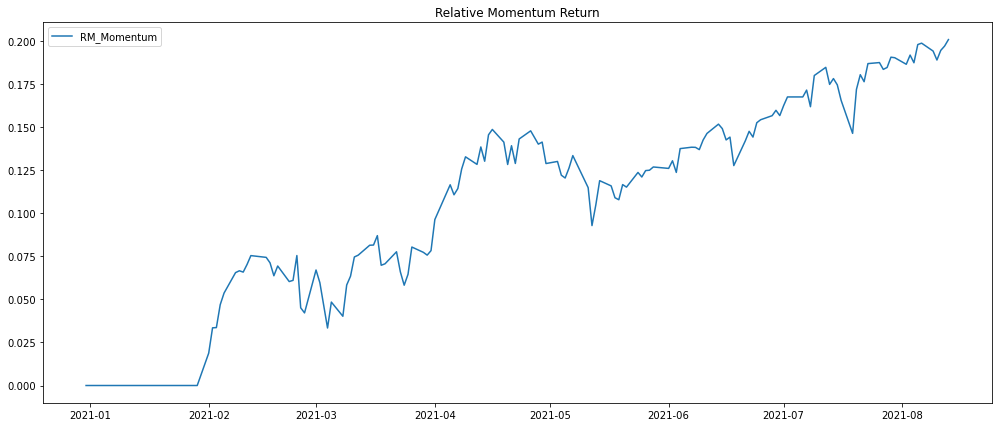

In [232]:
# Cumulative Compounded Returns for RelativeMomentum
plt.figure(figsize=(17,7))
plt.title('Relative Momentum Return')
plt.plot((1 + result).cumprod() - 1, label = 'RM_Momentum')
plt.legend()
plt.show()

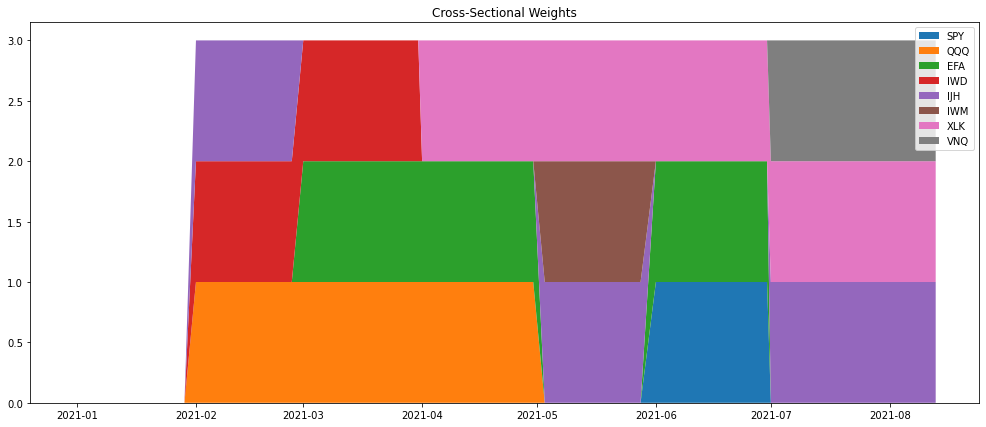

In [231]:
# Cross-Sectional Weights
plt.figure(figsize=(17,7))
plt.title('Cross-Sectional Weights')
plt.stackplot(book.index, np.transpose(book),labels = book.columns)
plt.legend()
plt.show()

In [230]:
signal

,SPY,QQQ,EFA,IWD,IJH,IWM,XLK,VNQ,YYYY-MM
2020-12-31,0,0,0,0,0,0,0,0,2020-12
2021-01-29,0,0,0,0,0,0,0,0,2021-01
2021-02-26,0,1,0,1,1,0,0,0,2021-02
2021-03-31,0,1,1,1,0,0,0,0,2021-03
2021-04-30,0,1,1,0,0,0,1,0,2021-04
2021-05-28,0,0,0,0,1,1,1,0,2021-05
2021-06-30,1,0,1,0,0,0,1,0,2021-06
2021-07-30,0,0,0,0,1,0,1,1,2021-07
2021-08-13,0,0,0,0,1,0,1,1,2021-08


In [222]:
book

,SPY,QQQ,EFA,IWD,IJH,IWM,XLK,VNQ
Date,,,,,,,,
2020-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-08-09,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2021-08-10,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2021-08-11,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
